In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from StanfordCars import *
from CarsModelClass import *

%matplotlib inline

def create_ROC_Curves(y, ypred, classes=[1,2,3]):
    fpr = dict()
    tpr = dict()
    auc_value = dict()
    
    # --- Binarize the true and preds
    y_true_bin = label_binarize(y, classes)
    #y_pred_bin = label_binarize(ypred, classes)
    #print(y_true_bin.shape)
    
    labels = {
        1: "ROC Curve for Convertibles",
        2: "ROC Curve for Sedans",
        3: "ROC Curve for SUVs/Trucks/Vans",
        4: "ROC Curve for Trucks",
        5: "ROC Curve for Vans"
    }
    
    if len(classes)>3:
        labels[3] = "ROC Curve for SUVs"
    
    # --- Get FPR, TPR & AUC for each class
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:,i], ypred[:,i])
        #print(len(fpr[i]))
        auc_value[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=labels[i+1]+" (area = {:.2f})".format(auc_value[i]),
                 linestyle = ":", lw=3)
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize = 15)
    plt.ylabel('True Positive Rate', fontsize = 15)
    plt.legend(loc="lower right", fontsize=15)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.title("Multi-class ROC for Classifying Car Images: One class vs Rest", fontsize = 18)
    plt.show()

In [21]:
cars_model = cars_model_class(no_of_classes=5)   
Xtrn = cars_model.Xtrain
xtst = cars_model.xtest
Ytrn = cars_model.Ytrain
ytst = cars_model.ytest

cars_PCA = PCA(n_components=500)
Xtrn_500 = cars_PCA.fit_transform(Xtrn)
xtst_500 = cars_PCA.transform(xtst)
print(np.sum(cars_PCA.explained_variance_ratio_))

logreg = LogisticRegression(C=10, verbose=True, solver="saga", max_iter=1000) # C: Inverse of regularization strength; 
logreg.fit(Xtrn_500, Ytrn)

0.9248598558922941


//anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 87 epochs took 4 seconds
convergence after 59 epochs took 2 seconds
convergence after 140 epochs took 7 seconds
max_iter reached after 46 seconds


//anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 46 seconds


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.8min finished


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=True,
                   warm_start=False)

Train Score for the Logit Model: 0.833
Test Score for the Logit Model: 0.785
F1 score for logistic regression: 0.7989025137642767
Confusion matrix: 

 [[849 171   8   2   1]
 [187 768  68   6  17]
 [ 16  83 472  29  19]
 [  1   5  44 275   6]
 [  2  16  16   0 176]]


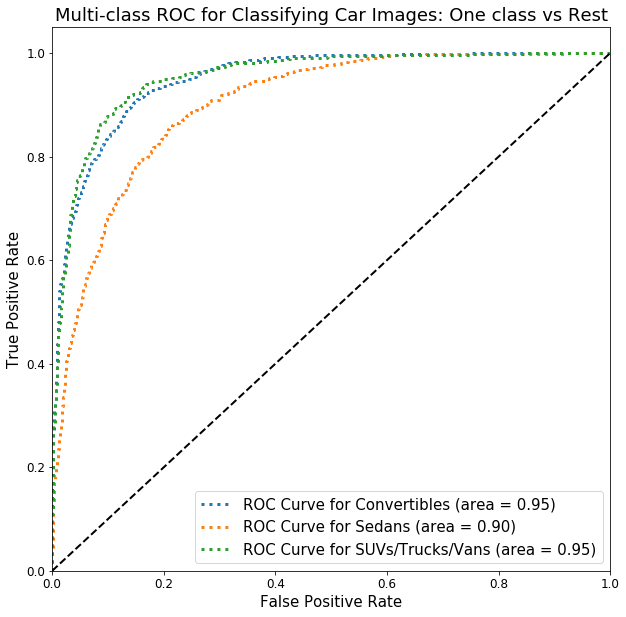

In [26]:
ytest_labels = logreg.predict(xtst_500)
ytest_prob = logreg.predict_proba(xtst_500)
train_score = logreg.score(Xtrn_500, Ytrn)
test_score = logreg.score(xtst_500, ytst)
print("Train Score for the Logit Model: {:.3f}".format(train_score))
print("Test Score for the Logit Model: {:.3f}".format(test_score))
print("F1 score for logistic regression: {}".format(f1_score(ytst, ytest_labels, average="macro")))
print("Confusion matrix: \n\n", confusion_matrix(ytst, ytest_labels))

plt.rcParams['figure.figsize'] = [10, 10]
create_ROC_Curves(ytst, ytest_prob)

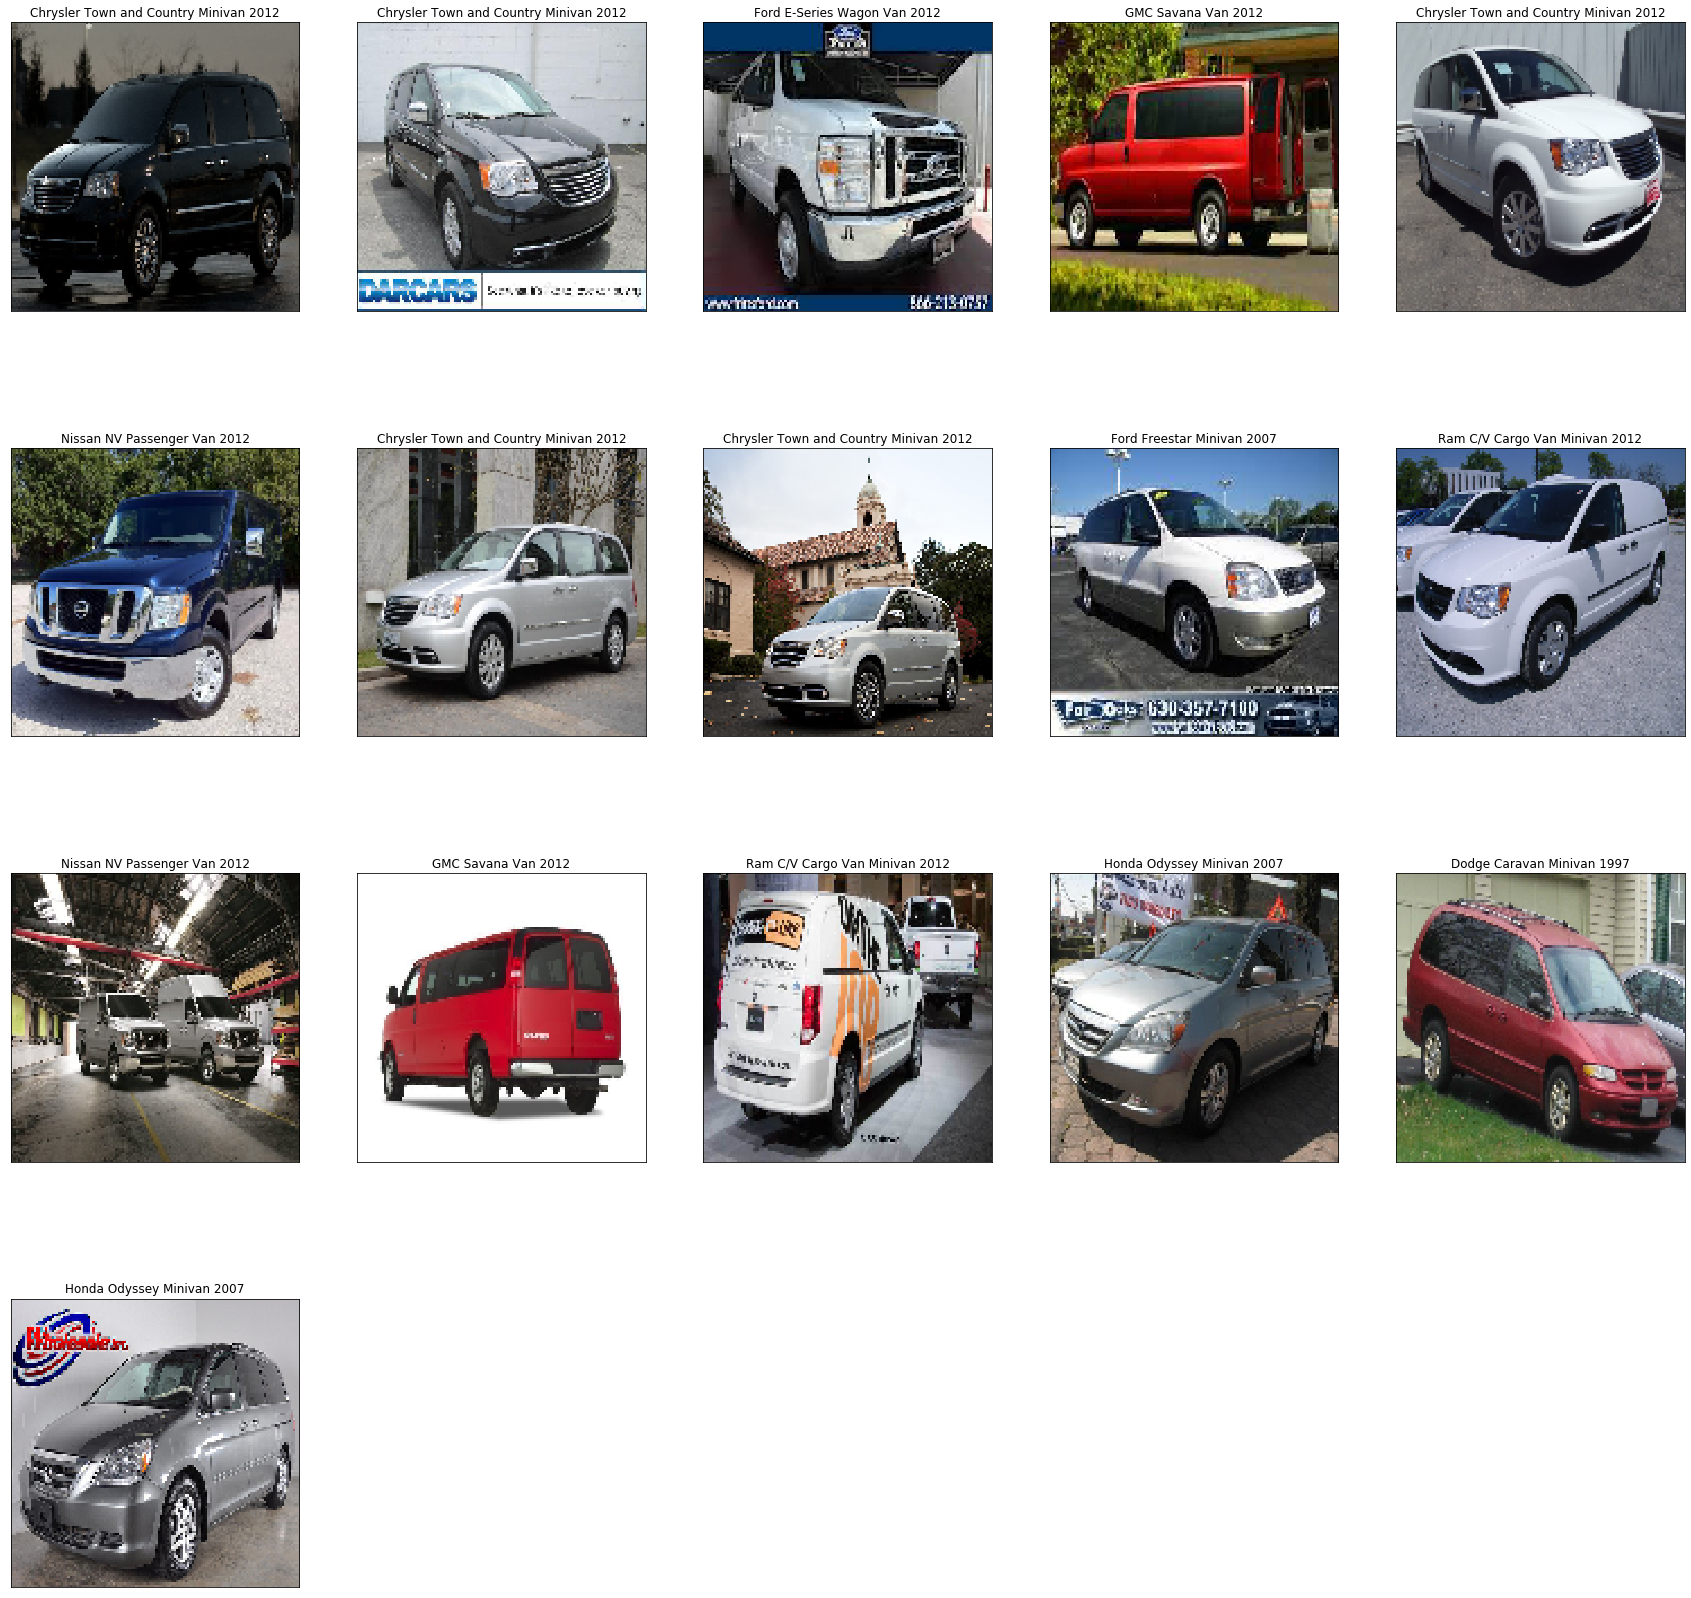

In [25]:
top20_12 = cars_model.get_misclass_topFileNames(ytest_labels, ytest_prob, 5, 3, 30)
GetStandfordCars().show_select_images(top20_12)

In [37]:
randomforest = RandomForestClassifier(n_estimators=500, max_depth=10, random_state = 333)
randomforest.fit(Xtrn_500, Ytrn)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=333,
                       verbose=0, warm_start=False)

Train Score for the Logit Model: 0.906
Test Score for the Logit Model: 0.689
F1 score for logistic regression: 0.6568938203977224
Confusion matrix: 

 [[793 236   2   0   0]
 [196 825  24   1   0]
 [ 23 230 362   3   1]
 [ 21  30 108 172   0]
 [ 18  80  34   0  78]]


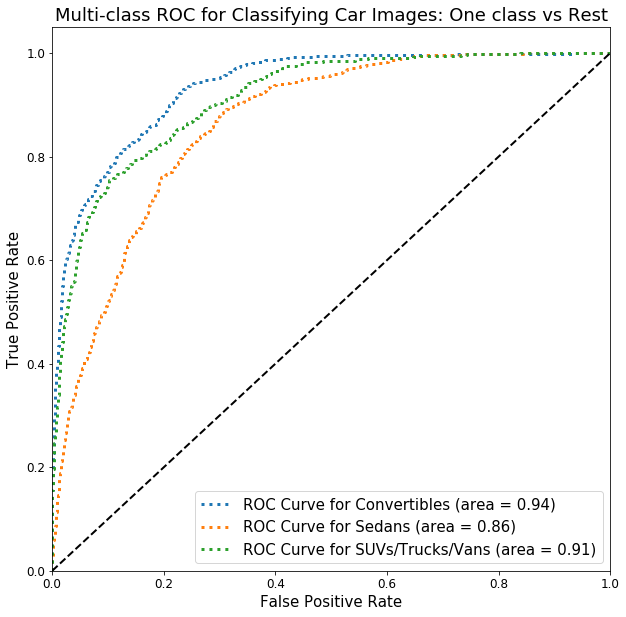

In [38]:
ytl_rf = randomforest.predict(xtst_500)
ytp_rf = randomforest.predict_proba(xtst_500)
train_score_rf = randomforest.score(Xtrn_500, Ytrn)
test_score_rf = randomforest.score(xtst_500, ytst)
print("Train Score for the Logit Model: {:.3f}".format(train_score_rf))
print("Test Score for the Logit Model: {:.3f}".format(test_score_rf))
print("F1 score for logistic regression: {}".format(f1_score(ytst, ytl_rf, average="macro")))
print("Confusion matrix: \n\n", confusion_matrix(ytst, ytl_rf))

plt.rcParams['figure.figsize'] = [10, 10]
create_ROC_Curves(ytst, ytp_rf)

In [39]:
cars_svc = SVC(kernel='poly', gamma='auto', probability=True, verbose=True)
cars_svc.fit(Xtrn_500, Ytrn)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=True)

Train Score for the Logit Model: 0.613
Test Score for the Logit Model: 0.593
F1 score for logistic regression: 0.5767572595977901
Confusion matrix: 

 [[ 493  538    0    0    0]
 [  30 1014    1    0    1]
 [   2  444  167    2    4]
 [   1  133   44  153    0]
 [   0   96   20    0   94]]


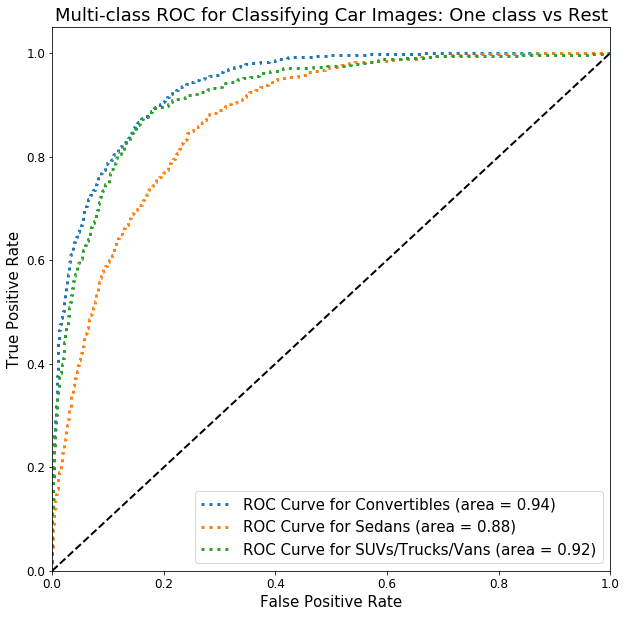

In [41]:
ytl_svc = cars_svc.predict(xtst_500)
ytp_svc = cars_svc.predict_proba(xtst_500)
train_score_svc = cars_svc.score(Xtrn_500, Ytrn)
test_score_svc = cars_svc.score(xtst_500, ytst)
print("Train Score for the Logit Model: {:.3f}".format(train_score_svc))
print("Test Score for the Logit Model: {:.3f}".format(test_score_svc))
print("F1 score for logistic regression: {}".format(f1_score(ytst, ytl_svc, average="macro")))
print("Confusion matrix: \n\n", confusion_matrix(ytst, ytl_svc))

plt.rcParams['figure.figsize'] = [10, 10]
create_ROC_Curves(ytst, ytp_svc)

In [48]:
from sklearn.linear_model import LogisticRegressionCV

cars_lrcv = LogisticRegressionCV(Cs=[0.0001, 0.01, 1, 100, 10000], cv=5, penalty='l2', solver='sag', max_iter = 1000, \
                                 verbose=True, multi_class = "multinomial", random_state = 333)
cars_lrcv.fit(Xtrn_500, Ytrn)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
convergence after 13 epochs took 1 seconds
convergence after 46 epochs took 5 seconds
convergence after 621 epochs took 58 seconds
max_iter reached after 91 seconds


//anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 92 seconds
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
convergence after 15 epochs took 2 seconds
convergence after 40 epochs took 3 seconds
convergence after 562 epochs took 50 seconds
max_iter reached after 86 seconds


//anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 86 seconds
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
convergence after 14 epochs took 2 seconds
convergence after 41 epochs took 3 seconds
convergence after 549 epochs took 48 seconds
max_iter reached after 86 seconds


//anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 87 seconds
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
convergence after 14 epochs took 1 seconds
convergence after 43 epochs took 4 seconds
convergence after 775 epochs took 67 seconds
max_iter reached after 87 seconds


//anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 86 seconds
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
convergence after 12 epochs took 1 seconds
convergence after 41 epochs took 3 seconds
convergence after 627 epochs took 54 seconds
max_iter reached after 86 seconds


//anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 85 seconds


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 19.6min finished


LogisticRegressionCV(Cs=[0.0001, 0.01, 1, 100, 10000], class_weight=None, cv=5,
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=1000, multi_class='multinomial',
                     n_jobs=None, penalty='l2', random_state=333, refit=True,
                     scoring=None, solver='sag', tol=0.0001, verbose=True)

Train Score for the Logit Model: 0.817
Test Score for the Logit Model: 0.787
F1 score for logistic regression: 0.7996969467350302
Confusion matrix: 

 [[850 173   6   2   0]
 [178 784  68   6  10]
 [ 11  88 478  23  19]
 [  1   4  56 269   1]
 [  3  19  18   3 167]]


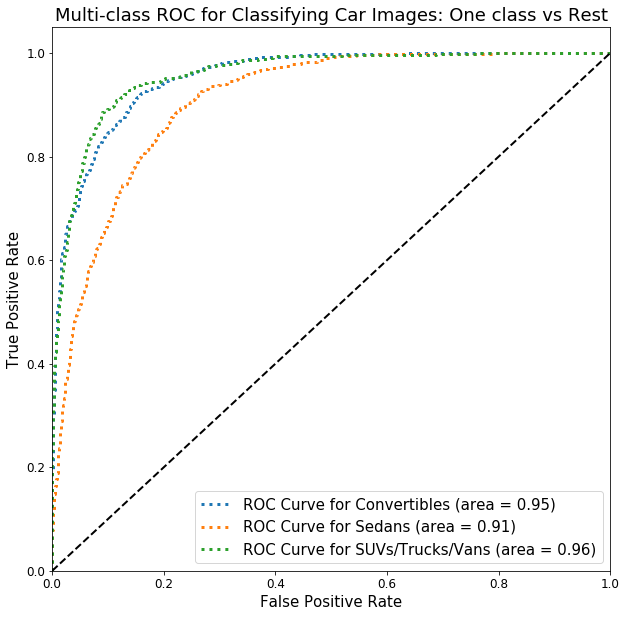

In [49]:
ytest_labels_lrcv = cars_lrcv.predict(xtst_500)
ytest_prob_lrcv = cars_lrcv.predict_proba(xtst_500)
train_score_lrcv = cars_lrcv.score(Xtrn_500, Ytrn)
test_score_lrcv = cars_lrcv.score(xtst_500, ytst)
print("Train Score for the Logit Model: {:.3f}".format(train_score_lrcv))
print("Test Score for the Logit Model: {:.3f}".format(test_score_lrcv))
print("F1 score for logistic regression: {}".format(f1_score(ytst, ytest_labels_lrcv, average="macro")))
print("Confusion matrix: \n\n", confusion_matrix(ytst, ytest_labels_lrcv))

plt.rcParams['figure.figsize'] = [10, 10]
create_ROC_Curves(ytst, ytest_prob_lrcv)

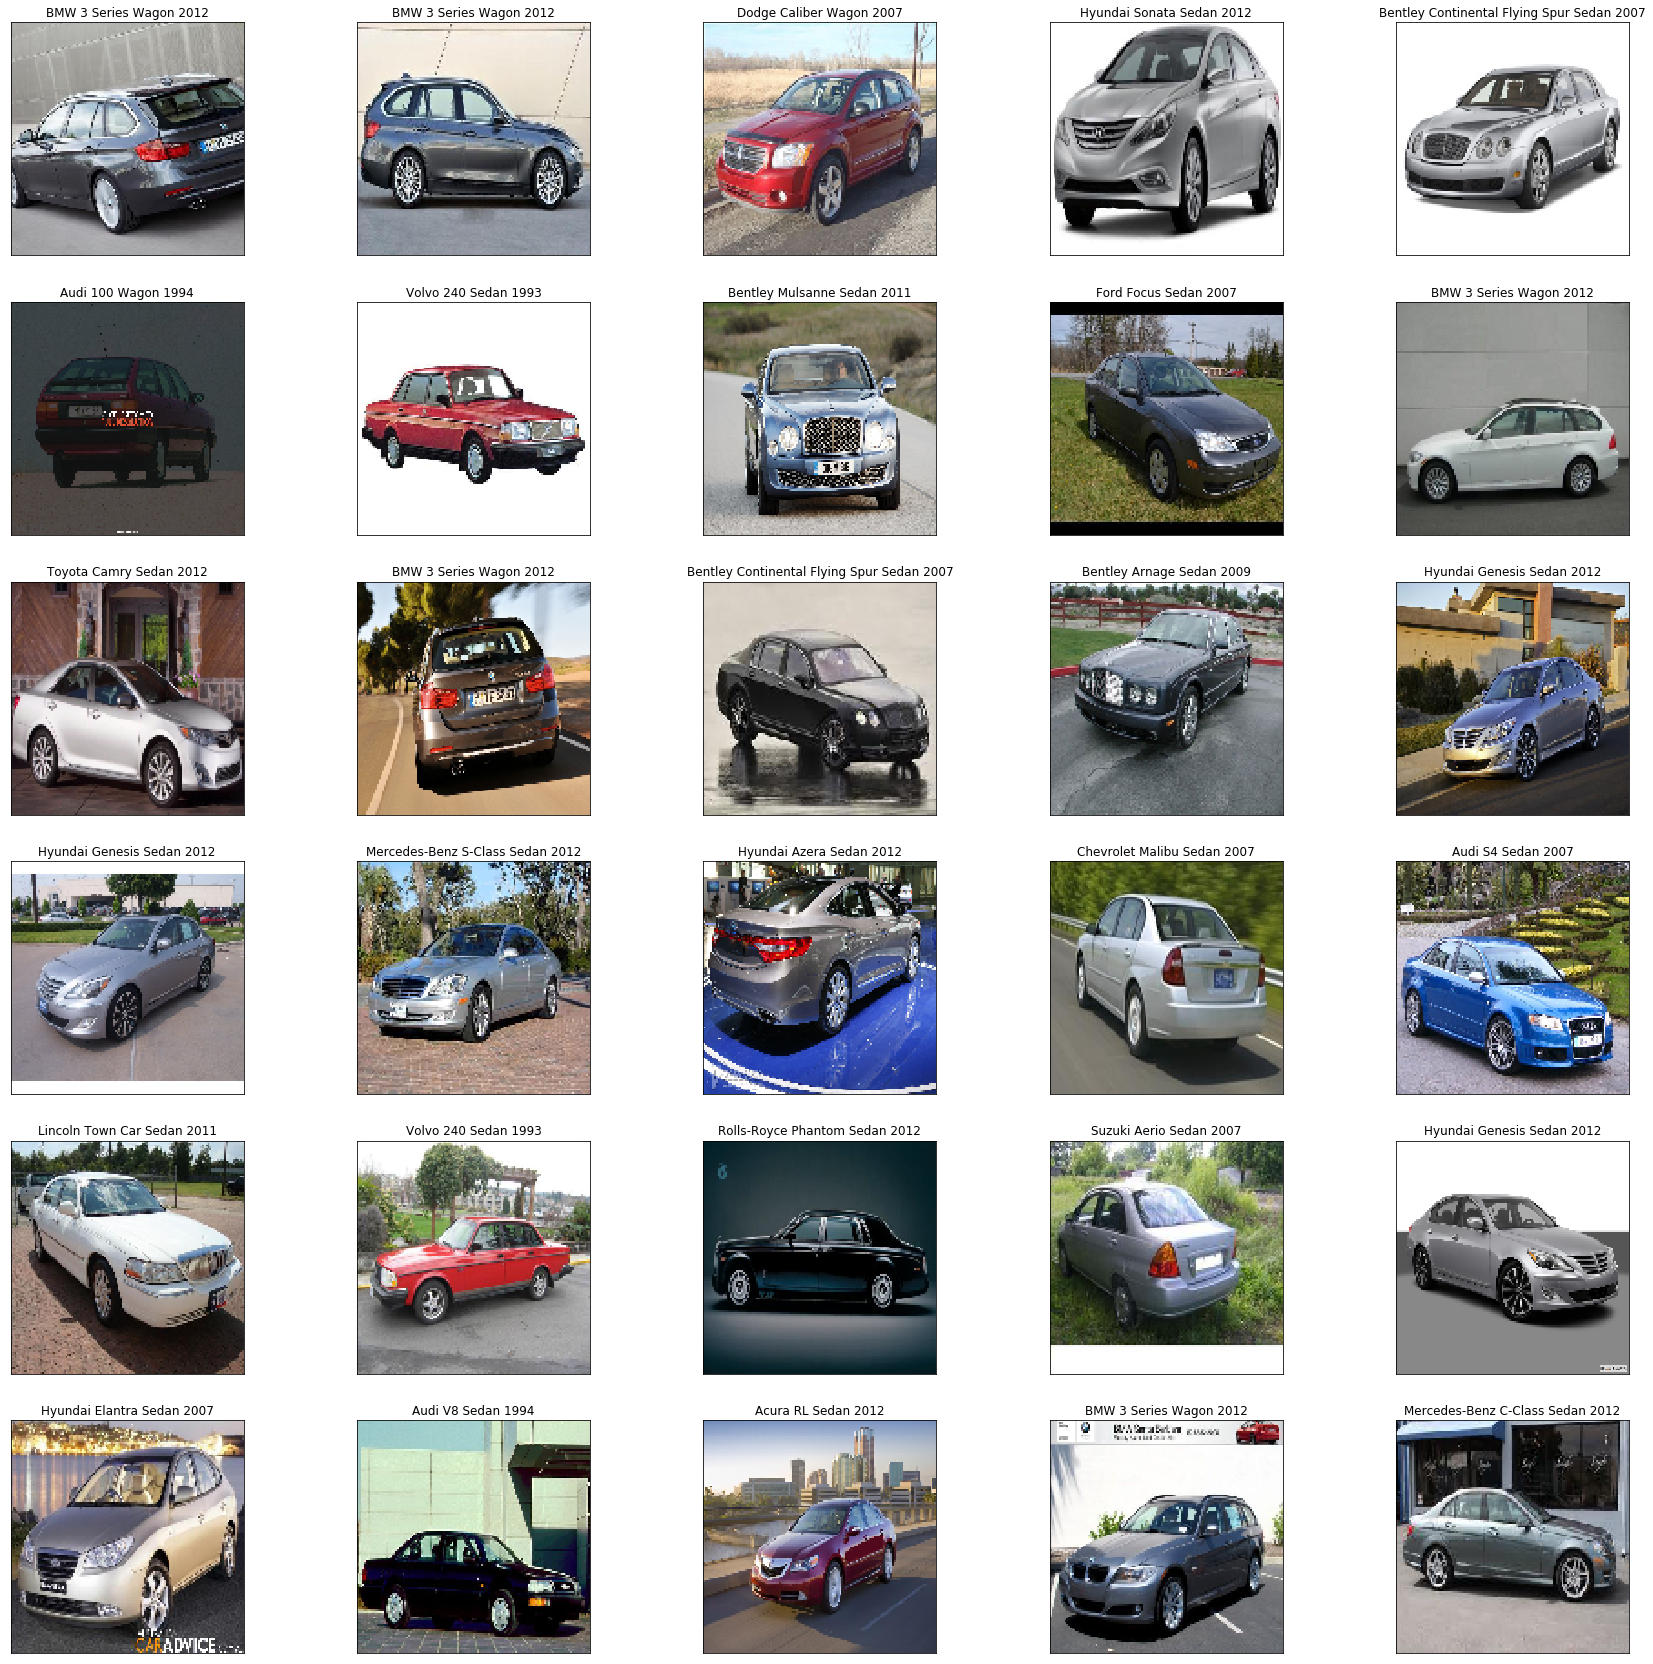

In [64]:
top20_lrcv = cars_model.get_misclass_topFileNames(ytest_labels, ytest_prob_lrcv, 2, 2, 30)
GetStandfordCars().show_select_images(top20_lrcv)

In [66]:
cars_lrcv.C_

array([0.01, 0.01, 0.01, 0.01, 0.01])

In [65]:
dump(logreg, "../Models/MobileNetV2/LogReg_wPCA_Model2_5Class.joblib")
dump(cars_svc, "../Models/MobileNetV2/SVC1_wPCA_Model2_5Class.joblib")
dump(randomforest, "../Models/MobileNetV2/RFq_wPCA_Model2_5Class.joblib")
dump(cars_lrcv, "../Models/MobileNetV2/LRCV_wPCA_Model2_5Class.joblib")

['../Models/MobileNetV2/LRCV_wPCA_Model2_5Class.joblib']

## Trying Oversamping Techniques

In [4]:
cars_model = cars_model_class(no_of_classes=5)   
Xtrn = cars_model.Xtrain
xtst = cars_model.xtest
Ytrn = cars_model.Ytrain
ytst = cars_model.ytest

cars_PCA = PCA(n_components=500)
Xtrn_500 = cars_PCA.fit_transform(Xtrn)
xtst_500 = cars_PCA.transform(xtst)
print(np.sum(cars_PCA.explained_variance_ratio_))

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X500_S1, y_S1 = ros.fit_sample(Xtrn_500, Ytrn)

0.9248946813965452


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 60 epochs took 14 seconds
Train Score for the Logit Model: 0.816
Test Score for the Logit Model: 0.777
F1 score for logistic regression: 0.7895468095513835
Confusion matrix: 

 [[838 173  13   6   1]
 [186 722  98  12  28]
 [  7  57 484  43  28]
 [  0   2  38 285   6]
 [  3   8  12   1 186]]


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.0s finished


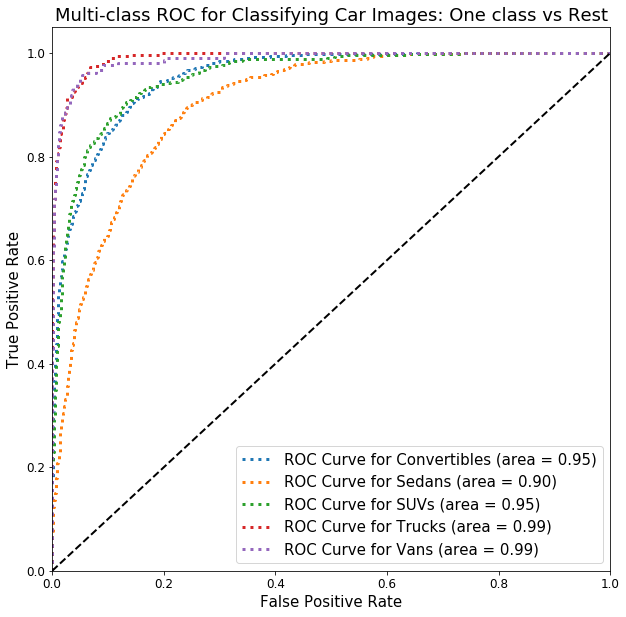

In [20]:
# --- S1: radom sample, S2: SMOTE, S3: ADASYN

logreg_S1 = LogisticRegression(C=0.01, verbose=True, solver="saga", multi_class = "multinomial", max_iter=1000) # C: Inverse of regularization strength; 
logreg_S1.fit(X500_S1, y_S1)

ytest_labels_lrS1 = logreg_S1.predict(xtst_500)
ytest_prob_lrS1 = logreg_S1.predict_proba(xtst_500)
train_score_lrS1 = logreg_S1.score(Xtrn_500, Ytrn)
test_score_lrS1 = logreg_S1.score(xtst_500, ytst)
print("Train Score for the Logit Model: {:.3f}".format(train_score_lrS1))
print("Test Score for the Logit Model: {:.3f}".format(test_score_lrS1))
print("F1 score for logistic regression: {}".format(f1_score(ytst, ytest_labels_lrS1, average="macro")))
print("Confusion matrix: \n\n", confusion_matrix(ytst, ytest_labels_lrS1))

plt.rcParams['figure.figsize'] = [10, 10]
create_ROC_Curves(ytst, ytest_prob_lrS1, classes=[1, 2, 3, 4, 5])

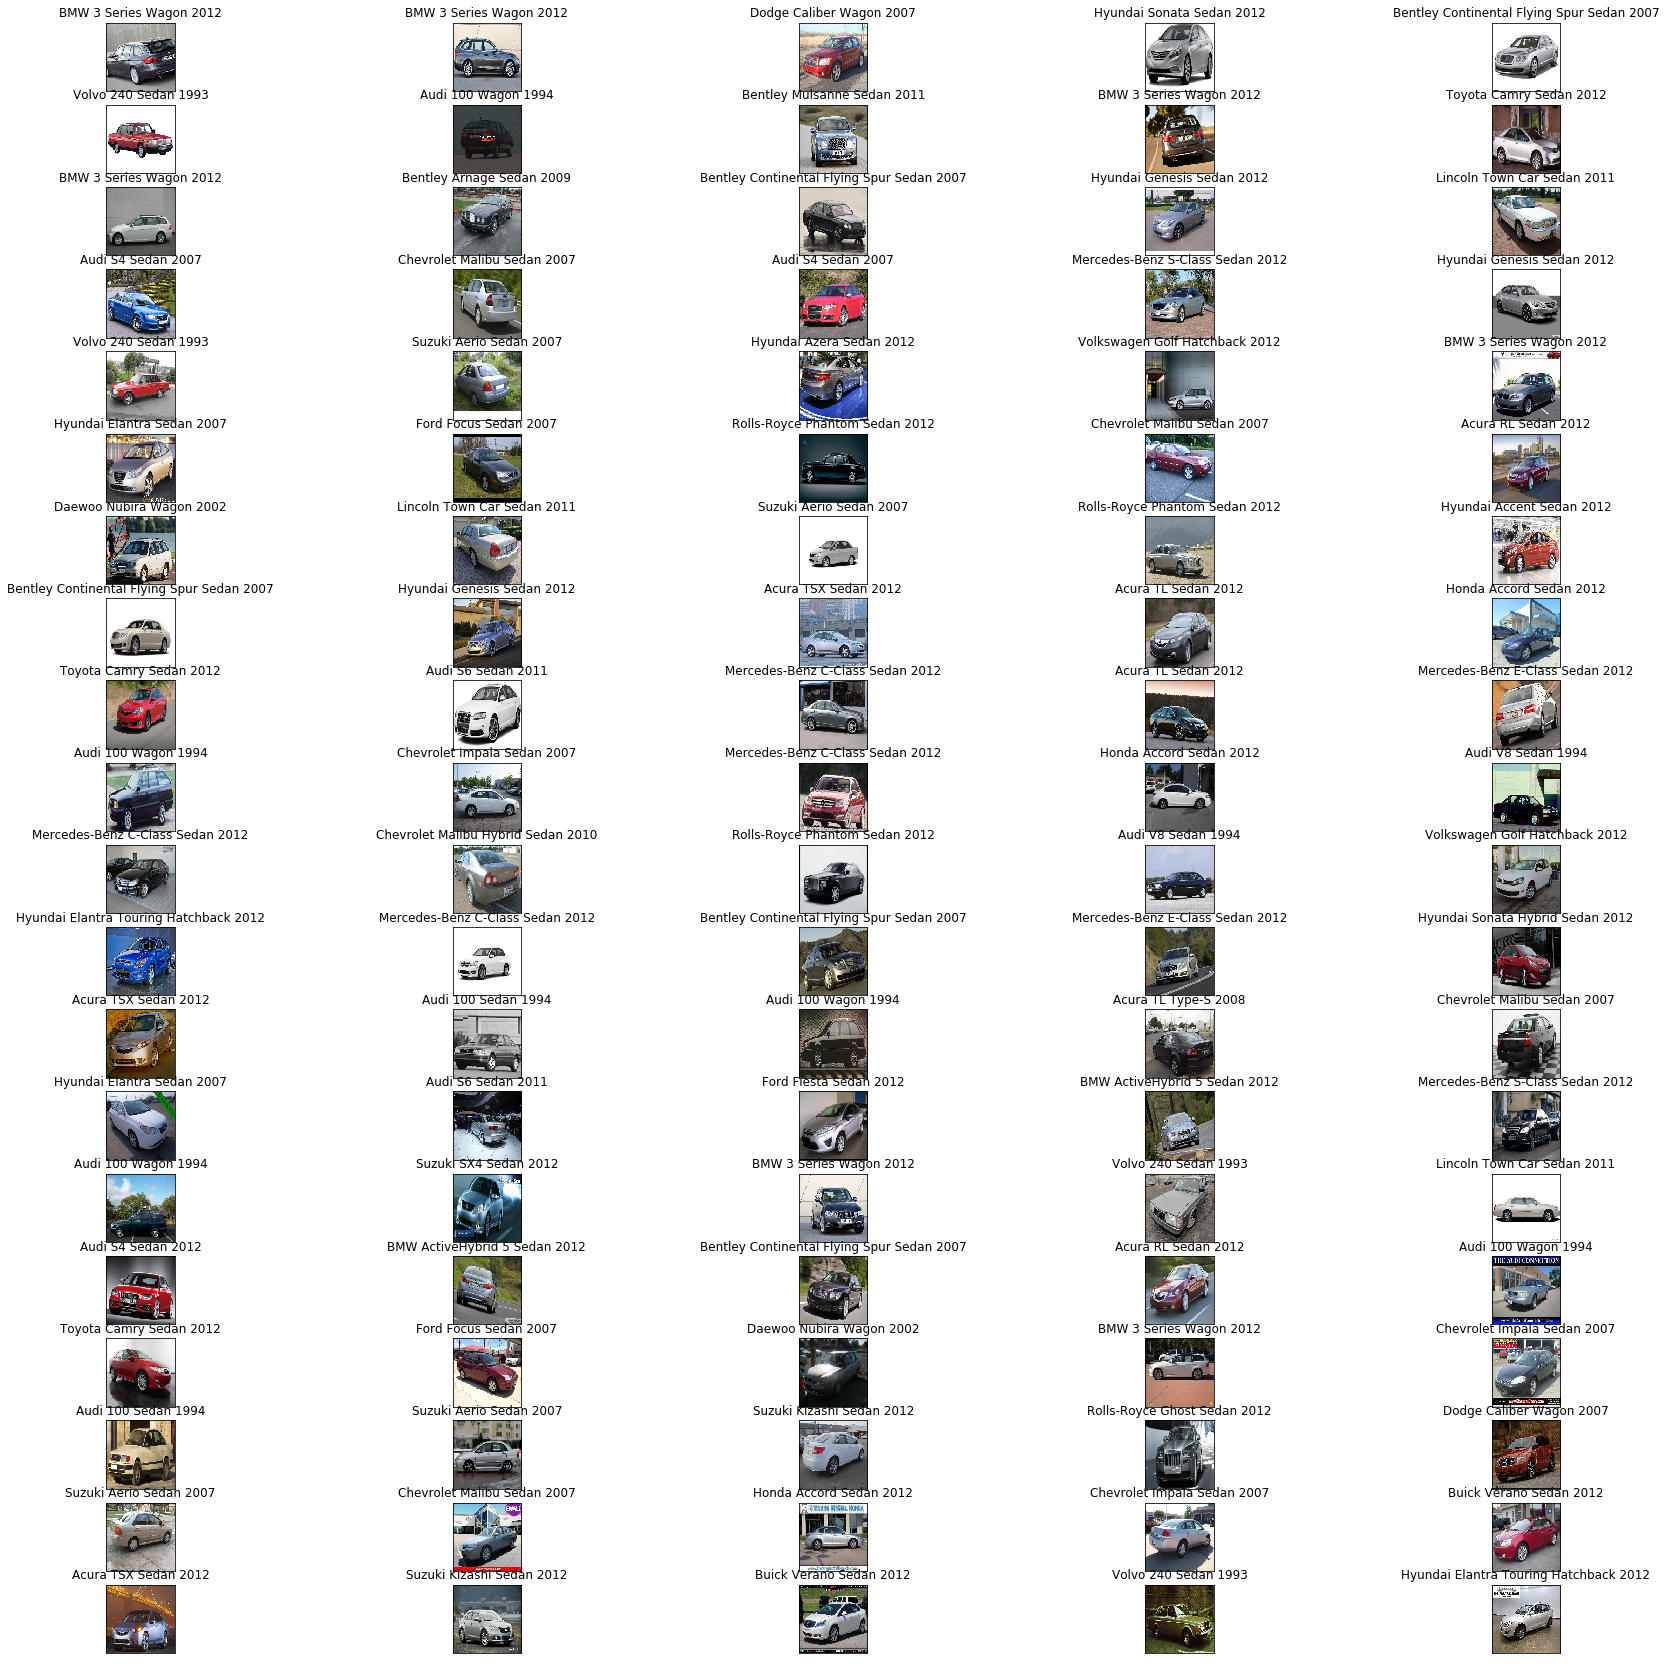

In [23]:
top20_lrS1 = cars_model.get_misclass_topFileNames(ytest_labels_lrS1, ytest_prob_lrS1, 2, 2, 100)
GetStandfordCars().show_select_images(top20_lrS1)

Train Score for the Logit Model: 0.951
Test Score for the Logit Model: 0.732
F1 score for logistic regression: 0.7520922360707625
Confusion matrix: 

 [[799 216  10   4   2]
 [217 681 121  10  17]
 [ 26  89 447  36  21]
 [  4   0  46 276   5]
 [  0  11  26   7 166]]


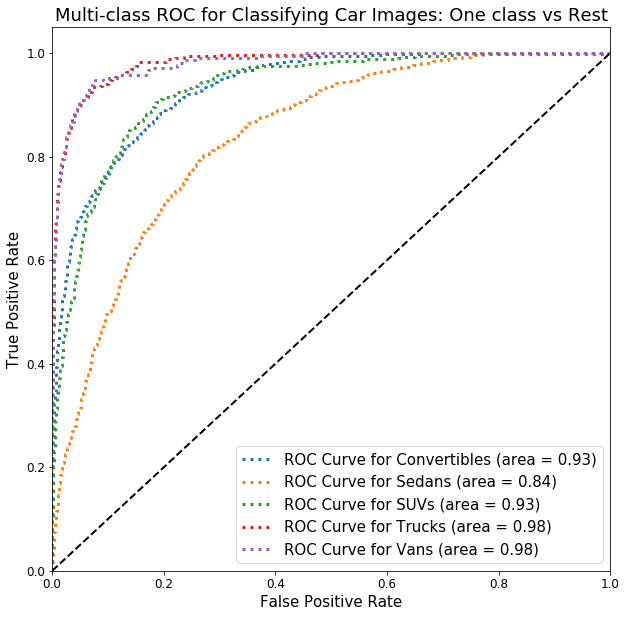

In [24]:
randomforest_S1 = RandomForestClassifier(n_estimators=500, max_depth=10, random_state = 333)
randomforest_S1.fit(X500_S1, y_S1)

ytest_labels_rfS1 = randomforest_S1.predict(xtst_500)
ytest_prob_rfS1 = randomforest_S1.predict_proba(xtst_500)
train_score_rfS1 = randomforest_S1.score(Xtrn_500, Ytrn)
test_score_rfS1 = randomforest_S1.score(xtst_500, ytst)
print("Train Score for the Logit Model: {:.3f}".format(train_score_rfS1))
print("Test Score for the Logit Model: {:.3f}".format(test_score_rfS1))
print("F1 score for logistic regression: {}".format(f1_score(ytst, ytest_labels_rfS1, average="macro")))
print("Confusion matrix: \n\n", confusion_matrix(ytst, ytest_labels_rfS1))

plt.rcParams['figure.figsize'] = [10, 10]
create_ROC_Curves(ytst, ytest_prob_rfS1, classes=[1, 2, 3, 4, 5])

In [26]:
from imblearn.over_sampling import SMOTE
X500_S2, y_S2 = SMOTE(random_state=42).fit_sample(Xtrn_500, Ytrn)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 67 epochs took 14 seconds
Train Score for the Logit Model: 0.815
Test Score for the Logit Model: 0.778
F1 score for logistic regression: 0.7902888054905463
Confusion matrix: 

 [[845 171  11   2   2]
 [187 725  98  12  24]
 [  8  60 481  40  30]
 [  1   3  39 282   6]
 [  3  10  10   2 185]]


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.3s finished


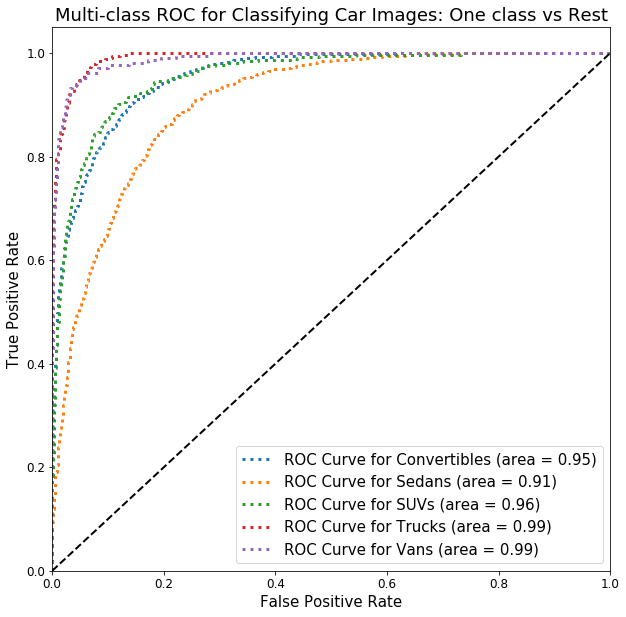

In [27]:
# --- S1: radom sample, S2: SMOTE, S3: ADASYN

logreg_S2 = LogisticRegression(C=0.01, verbose=True, solver="saga", multi_class = "multinomial", max_iter=1000) # C: Inverse of regularization strength; 
logreg_S2.fit(X500_S2, y_S2)

ytest_labels_lrS2 = logreg_S2.predict(xtst_500)
ytest_prob_lrS2 = logreg_S2.predict_proba(xtst_500)
train_score_lrS2 = logreg_S2.score(Xtrn_500, Ytrn)
test_score_lrS2 = logreg_S2.score(xtst_500, ytst)
print("Train Score for the Logit Model: {:.3f}".format(train_score_lrS2))
print("Test Score for the Logit Model: {:.3f}".format(test_score_lrS2))
print("F1 score for logistic regression: {}".format(f1_score(ytst, ytest_labels_lrS2, average="macro")))
print("Confusion matrix: \n\n", confusion_matrix(ytst, ytest_labels_lrS2))

plt.rcParams['figure.figsize'] = [10, 10]
create_ROC_Curves(ytst, ytest_prob_lrS2, classes=[1, 2, 3, 4, 5])

/Users/bhanuyerra/Documents/MetisDatScienceBootcamp/Projects/Metis_Prj3/Code/CarsModelClass.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fileNames_df.sort_values(str(int(yfalse)), ascending=False, inplace=True)


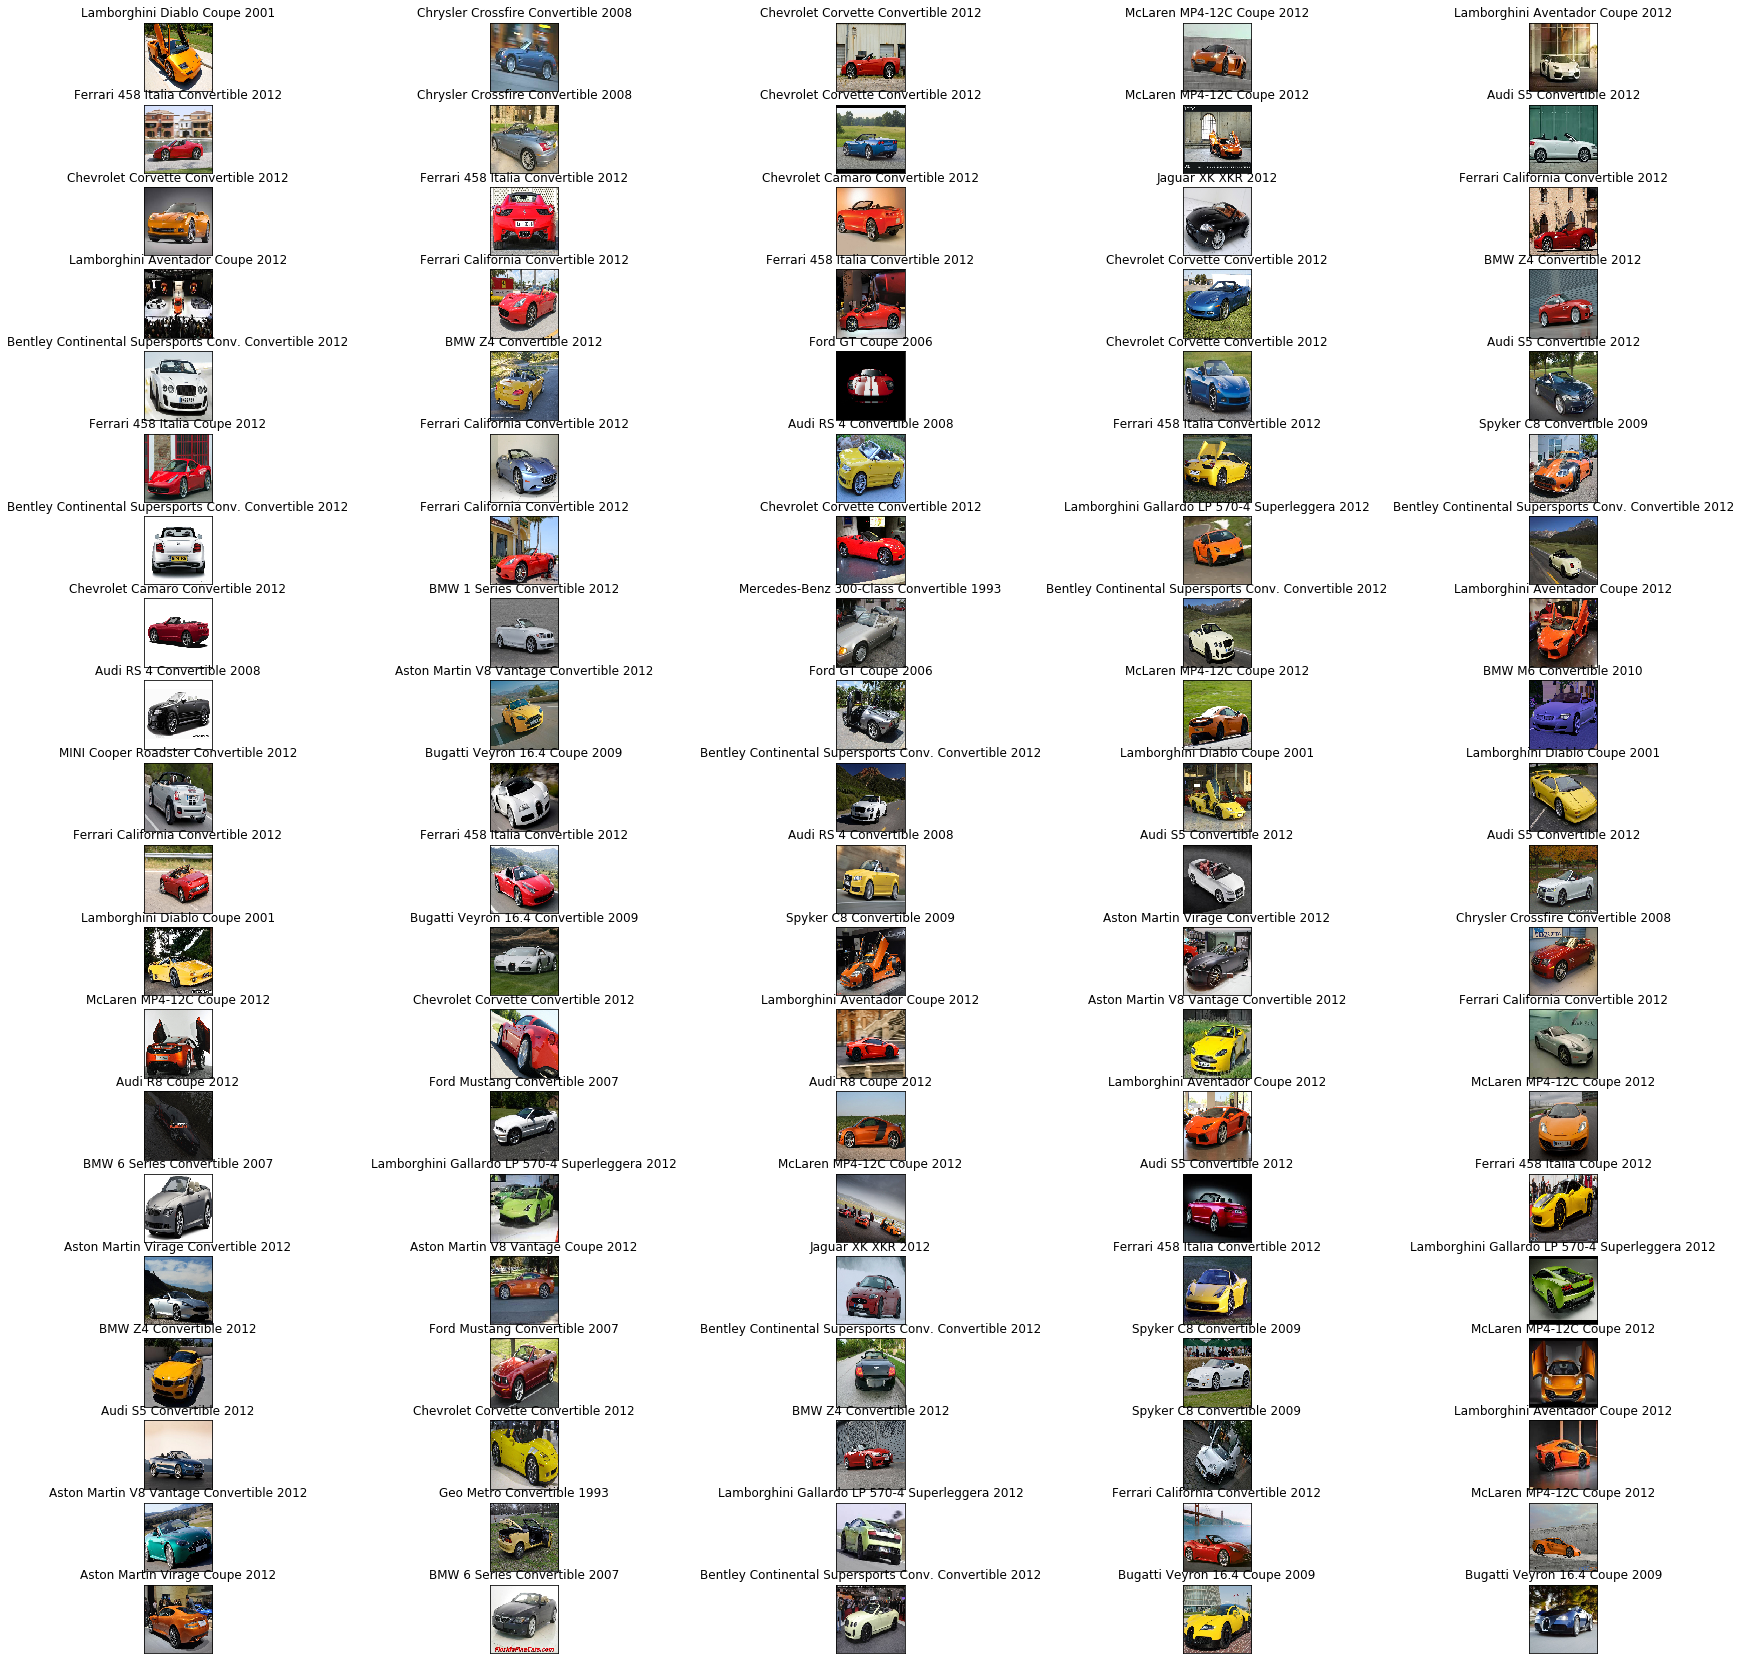

In [29]:
top20_lrS2 = cars_model.get_misclass_topFileNames(ytest_labels_lrS2, ytest_prob_lrS2, 1, 1, 100)
GetStandfordCars().show_select_images(top20_lrS2)

Train Score for the Logit Model: 0.976
Test Score for the Logit Model: 0.730
F1 score for logistic regression: 0.7465412608634757
Confusion matrix: 

 [[809 207  10   4   1]
 [220 676 115  12  23]
 [ 21  92 433  37  36]
 [  6   2  46 270   7]
 [  3  10  19   3 175]]


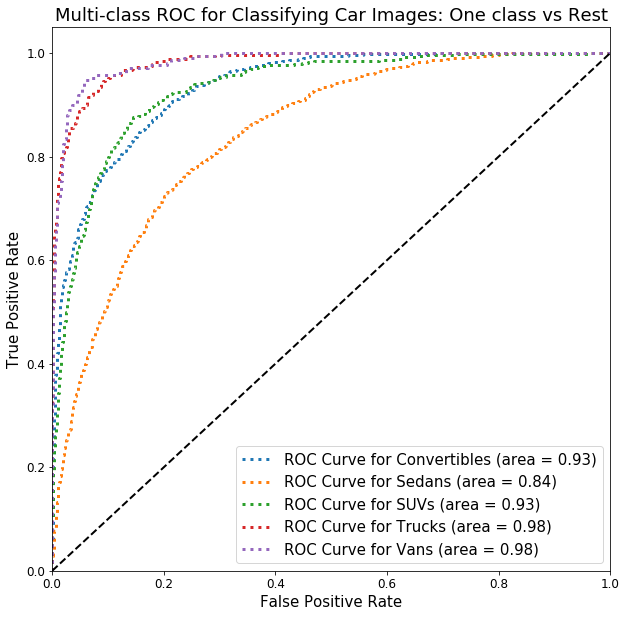

In [28]:
randomforest_S2 = RandomForestClassifier(n_estimators=500, max_depth=10, random_state = 333)
randomforest_S2.fit(X500_S2, y_S2)

ytest_labels_rfS2 = randomforest_S2.predict(xtst_500)
ytest_prob_rfS2 = randomforest_S2.predict_proba(xtst_500)
train_score_rfS2 = randomforest_S2.score(Xtrn_500, Ytrn)
test_score_rfS2 = randomforest_S2.score(xtst_500, ytst)
print("Train Score for the Logit Model: {:.3f}".format(train_score_rfS2))
print("Test Score for the Logit Model: {:.3f}".format(test_score_rfS2))
print("F1 score for logistic regression: {}".format(f1_score(ytst, ytest_labels_rfS2, average="macro")))
print("Confusion matrix: \n\n", confusion_matrix(ytst, ytest_labels_rfS2))

plt.rcParams['figure.figsize'] = [10, 10]
create_ROC_Curves(ytst, ytest_prob_rfS2, classes=[1, 2, 3, 4, 5])